In [1]:
import numpy as np
from mnist import MNIST
from sklearn import linear_model
from sklearn.metrics import accuracy_score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [14]:
mntrain = MNIST('MNIST', gz=True)
mntrain.load_training()
Xtrain_all = np.asarray(mntrain.train_images)
ytrain_all = np.asarray(mntrain.train_labels.tolist())

mntest = MNIST('MNIST', gz=True)
mntest.load_testing()
Xtest_all = np.asarray(mntest.test_images)
ytest_all = np.asarray(mntest.test_labels.tolist())

print(len(Xtrain_all))
print(len(ytrain_all))
print(len(Xtest_all))
print(len(ytest_all))

60000
60000
10000
10000


In [18]:
# Extract two classes 
def extract_data(X, y, classes):
    y_res_id = np.array([])
    for i in classes[0]:
        y_res_id = np.hstack((y_res_id, np.where(y==i)[0]))
    n0 = len(y_res_id)
    
    for i in classes[1]:
        y_res_id = np.hstack((y_res_id, np.where(y==i)[0]))
    n1 = len(y_res_id) - n0
    
    y_res_id = y_res_id.astype('int32')
    X_res = X[y_res_id, :]
    y_res = np.asarray([0]*n0 + [1]*n1)
    
    return (X_res, y_res)

In [19]:
# Exmaple extract for '0' and '1'
cls = [[0], [1]]
(X_train, y_train) = extract_data(Xtrain_all, ytrain_all, cls)
(X_test, y_test) = extract_data(Xtest_all, ytest_all, cls)

In [21]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train) # logreg.fit(Xtrain_all, ytrain_all)

y_pred = logreg.predict(X_test) # y_pred = logreg.predict(Xtest_all)
accuracy_score(y_test, y_pred.tolist()) * 100

99.90543735224587

In [22]:
print(y_test.shape)
print(y_pred.shape)

(2115,)
(2115,)


In [45]:
def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True
    
    A = A - np.average(A)
    
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)
        
    image = np.ones(shape=(int(buf + m * (sz + buf)), int(buf + n * (sz + buf))))
    
    if not opt_graycolor:
        image *= 0.1
        
    k = 0
    
    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue
                
            clim = np.max(np.abs(A[:, k]))
            
            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1
            
    return image

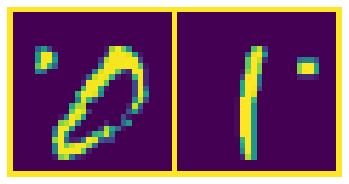

In [46]:
import matplotlib.pyplot as plt

mis = np.where((y_pred - y_test) != 0)[0]
Xmis = X_test[mis, :]

plt.axis('off')
A = display_network(Xmis.T)
f2 = plt.imshow(A, interpolation='nearest')
plt.show()